In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Firstly, I read the data.

flights = pd.read_csv("BOS_CUN_trips1M.csv",)
flights.head()

,messageid,tripindex,received,currency,total,tax,surcharge,source,merchant,majorcarrierid,...,refundable,triptimestamp,receiveddate,received_odate,departure_odate,return_ddate,los2,departure_dow,return_dow,includes_sns
0,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,12,1382317607,USD,631.45,123.45,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
1,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,11,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
2,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,10,1382317607,USD,620.95,124.95,0.0,Sabre,TCY,B6,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
3,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,9,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
4,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,8,1382317607,USD,565.95,124.95,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1


In [3]:
flights.tail()

,messageid,tripindex,received,currency,total,tax,surcharge,source,merchant,majorcarrierid,...,refundable,triptimestamp,receiveddate,received_odate,departure_odate,return_ddate,los2,departure_dow,return_dow,includes_sns
1202440,15742f8fd2e292ff0000014122f1ba477cbc247adc40c446,19,1379270769,USD,664.37,101.37,0.0,Sabre,TCY,B6,...,False,1379270769,20130915,2013-09-15,2014-04-16,2014-04-23,7,3,3,1
1202441,15742f8fd2e292ff0000014122f1ba477cbc247adc40c446,20,1379270769,USD,486.87,113.87,0.0,Sabre,TCY,UA,...,False,1379270769,20130915,2013-09-15,2014-04-16,2014-04-23,7,3,3,1
1202442,15742f8fd2e292ff0000014122f1ba477cbc247adc40c446,21,1379270769,USD,554.87,113.87,0.0,Sabre,TCY,US,...,False,1379270769,20130915,2013-09-15,2014-04-16,2014-04-23,7,3,3,1
1202443,15742f8fd2e292ff0000014122f1ba477cbc247adc40c446,22,1379270769,USD,486.87,113.87,0.0,Sabre,TCY,UA,...,False,1379270769,20130915,2013-09-15,2014-04-16,2014-04-23,7,3,3,1
1202444,15742f8fd2e292ff0000014122f1ba477cbc247adc40c446,23,1379270769,USD,561.87,120.87,0.0,Sabre,TCY,US,...,False,1379270769,20130915,2013-09-15,2014-04-16,2014-04-23,7,3,3,1


In [4]:
# I want to see all the  column names.

flights.columns

Index([u'messageid', u'tripindex', u'received', u'currency', u'total', u'tax',
       u'surcharge', u'source', u'merchant', u'majorcarrierid', u'origin',
       u'destination', u'departure', u'return', u'outbounddurationminutes',
       u'outboundstops', u'returndurationminutes', u'returnstops',
       u'availableseats', u'cabinclass', u'paxtype', u'refundable',
       u'triptimestamp', u'receiveddate', u'received_odate',
       u'departure_odate', u'return_ddate', u'los2', u'departure_dow',
       u'return_dow', u'includes_sns'],
      dtype='object')

In [5]:
# I want to get some basic information about the flights DataFrame

flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202445 entries, 0 to 1202444
Data columns (total 31 columns):
messageid                  1202445 non-null object
tripindex                  1202445 non-null int64
received                   1202445 non-null int64
currency                   1202445 non-null object
total                      1202445 non-null float64
tax                        1202445 non-null float64
surcharge                  1202445 non-null float64
source                     1202445 non-null object
merchant                   1202445 non-null object
majorcarrierid             1202445 non-null object
origin                     1202445 non-null object
destination                1202445 non-null object
departure                  1202445 non-null int64
return                     1202445 non-null int64
outbounddurationminutes    1202445 non-null int64
outboundstops              1202445 non-null int64
returndurationminutes      1202445 non-null int64
returnstops             

In [6]:
# I now add a column where I add together the 'total' and 'tax'

flights['final total'] = flights['total'] + flights['tax']

flights.head()

,messageid,tripindex,received,currency,total,tax,surcharge,source,merchant,majorcarrierid,...,triptimestamp,receiveddate,received_odate,departure_odate,return_ddate,los2,departure_dow,return_dow,includes_sns,final total
0,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,12,1382317607,USD,631.45,123.45,0.0,Sabre,TCY,US,...,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1,754.9
1,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,11,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,...,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1,757.9
2,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,10,1382317607,USD,620.95,124.95,0.0,Sabre,TCY,B6,...,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1,745.9
3,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,9,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,...,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1,757.9
4,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,8,1382317607,USD,565.95,124.95,0.0,Sabre,TCY,US,...,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1,690.9


'I noticed one very obvious outlier at ~$7,000\n75%  of the tickets are under around ~$1400'

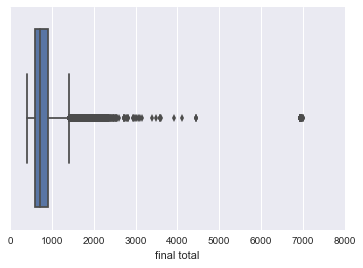

In [8]:
'''Again, I now want to quick visualise the data using a box plot
This will help me to see how the data are spread out.
Here I make the assumption that the total includes the tax.'''

sns.boxplot(flights['final total'], vert=False)

'''I noticed one very obvious outlier at ~$7,000
75%  of the tickets are under around ~$1400'''

(array([  3.10422000e+05,   4.45737000e+05,   1.89800000e+05,
          1.15648000e+05,   7.20450000e+04,   4.39630000e+04,
          1.77580000e+04,   5.65400000e+03,   9.25000000e+02,
          2.77000000e+02,   4.40000000e+01,   1.30000000e+01,
          1.20000000e+01,   6.00000000e+00,   4.00000000e+00,
          1.00000000e+00,   6.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.24000000e+02]),
 array([  407.94      ,   596.46971429,   784.99942857,   973.52914286,
         1162.05885714,  1350.58857143,  1539.11828571,  1727.648     ,
         1916.17771429,  2104.70742857,  2293.23714286,  2481.76685714,
         2670.29657143,  2858.82628571,  3047.356     , 

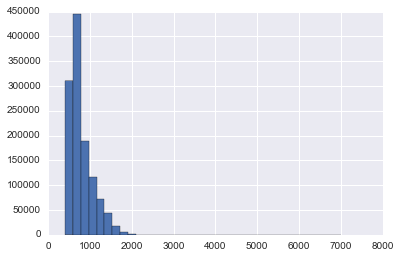

In [9]:
'''This time round, I don't bother with a violin plot. I use a histogram. 
I played around witht the number of bins and decided to stick to 35 as this produces a clear picture.
Looking at the histogram, I actually think I could have skipped the violin plot.'''

plt.hist(flights['final total'], bins=35)

(array([    179.,    2125.,   27716.,   96872.,   91210.,  100901.,
          90527.,   75824.,   83202.,   69508.,   72829.,   53036.,
          42395.,   35113.,   31233.,   30041.,   25172.,   22716.,
          26324.,   24146.,   20227.,   18065.,   14857.,   10231.,
          12171.,   12663.,   12369.,   13476.,   10478.,   13102.,
          12457.,    6132.,    7360.,    6277.,    4508.,    4042.,
           3719.,    3343.,    4011.,    2479.,    1746.,    1448.,
            890.,    1377.,    1409.,     416.,     651.,     153.,
            280.,     176.]),
 array([  407.94 ,   439.776,   471.612,   503.448,   535.284,   567.12 ,
          598.956,   630.792,   662.628,   694.464,   726.3  ,   758.136,
          789.972,   821.808,   853.644,   885.48 ,   917.316,   949.152,
          980.988,  1012.824,  1044.66 ,  1076.496,  1108.332,  1140.168,
         1172.004,  1203.84 ,  1235.676,  1267.512,  1299.348,  1331.184,
         1363.02 ,  1394.856,  1426.692,  1458.528,  149

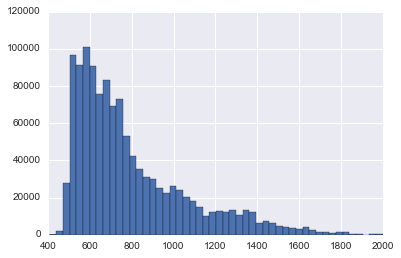

In [10]:
'''It seems to me that it would make sense to visualise the data for prices below $2,100.
This will allow me to see better the distribution around those lower values.'''

flights2 = flights[flights['final total'] < 2000]

plt.hist(flights2['final total'], bins=50)

In [11]:
'''I have now seen how the data are distributed.
I want to get now the actual numbers for the mean and quartiles.'''

flights_price = flights['final total']
flights_price = pd.DataFrame(flights_price)
flights_price.describe()

,final total
count,1.202445e+06
mean,7.953032e+02
std,2.800083e+02
min,4.079400e+02
25%,5.939000e+02
50%,7.079000e+02
75%,9.163000e+02
max,7.006480e+03


In [ ]:
'''This means that the mean price is ~$674, we will pay the minimum of $408. 
50% of the flights cost $708 or less and 75% of the flights cost $916 or less.
The most expensive flight was at $7001.
We also see that the standard deviation is quite high at $280'''